In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
#it is better to import this lib:
import html5lib


In [67]:
url= 'https://www.eia.gov/dnav/pet/hist/rwtcD.htm'

In [68]:
#We use the read_html method of the Pandas library to read the HTML tables.this will return a list of df.
#skiprows skip anyrow we wish, here we set it to 0 because we need all of it(we dont need it here).
#header makes the heads of the columns
# we need to add [0] if need to select first item of returened list, because read_html return list of DataFrames:

 
df_1 = pd.read_html(url, header=0)[5]
df_1

,Week Of,Mon,Tue,Wed,Thu,Fri
0,1985 Dec-30 to Jan- 3,NaN,NaN,NaN,25.56,26.00
1,1986 Jan- 6 to Jan-10,26.53,25.85,25.87,26.03,25.65
2,1986 Jan-13 to Jan-17,25.08,24.97,25.18,23.98,23.63
3,1986 Jan-20 to Jan-24,21.33,20.61,20.25,19.93,19.45
4,1986 Jan-27 to Jan-31,20.87,19.45,19.61,19.58,18.95
...,...,...,...,...,...,...
2174,2020 Sep-21 to Sep-25,39.26,39.55,39.92,40.11,40.06
2175,2020 Sep-28 to Oct- 2,40.47,39.03,40.05,38.51,36.90
2176,2020 Oct- 5 to Oct- 9,39.12,40.52,39.82,41.04,40.44
2177,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_1.isnull().sum()

Week Of    363
Mon        518
Tue        379
Wed        381
Thu        408
Fri        442
dtype: int64

In [70]:
df_1.columns

Index(['Week Of', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype='object')

In [71]:
df_2 = df_1.loc[:, 'Mon']
df_2

0         NaN
1       26.53
2       25.08
3       21.33
4       20.87
        ...  
2174    39.26
2175    40.47
2176    39.12
2177      NaN
2178    39.22
Name: Mon, Length: 2179, dtype: float64

In [72]:
gold = pd.read_csv('gld_price_data.csv')
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [73]:
gold_1 = gold.loc[:, ['Date', 'SLV']]
gold_1

,Date,SLV
0,1/2/2008,15.1800
1,1/3/2008,15.2850
2,1/4/2008,15.1670
3,1/7/2008,15.0530
4,1/8/2008,15.5900
...,...,...
2285,5/8/2018,15.5100
2286,5/9/2018,15.5300
2287,5/10/2018,15.7400
2288,5/14/2018,15.5600


In [74]:
gld_1 = gold_1.loc[0:2178]
gld_1

,Date,SLV
0,1/2/2008,15.180000
1,1/3/2008,15.285000
2,1/4/2008,15.167000
3,1/7/2008,15.053000
4,1/8/2008,15.590000
...,...,...
2174,11/15/2017,16.030001
2175,11/20/2017,15.980000
2176,11/21/2017,16.010000
2177,11/22/2017,16.170000


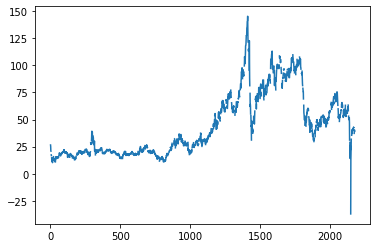

In [76]:
df_2.plot()

In [75]:
gld_slv = pd.concat([gld_1, df_2], axis=1)
gld_slv

,Date,SLV,Mon
0,1/2/2008,15.180000,NaN
1,1/3/2008,15.285000,26.53
2,1/4/2008,15.167000,25.08
3,1/7/2008,15.053000,21.33
4,1/8/2008,15.590000,20.87
...,...,...,...
2174,11/15/2017,16.030001,39.26
2175,11/20/2017,15.980000,40.47
2176,11/21/2017,16.010000,39.12
2177,11/22/2017,16.170000,NaN


In [93]:
gld_slv['Date']= pd.to_datetime(gld_slv['Date'])

In [97]:
gld_slv['Year'] = gld_slv['Date'].dt.year
gld_slv

,Date,SLV,Mon,Year
0,2008-01-02,15.180000,NaN,2008
1,2008-01-03,15.285000,26.53,2008
2,2008-01-04,15.167000,25.08,2008
3,2008-01-07,15.053000,21.33,2008
4,2008-01-08,15.590000,20.87,2008
...,...,...,...,...
2174,2017-11-15,16.030001,39.26,2017
2175,2017-11-20,15.980000,40.47,2017
2176,2017-11-21,16.010000,39.12,2017
2177,2017-11-22,16.170000,NaN,2017


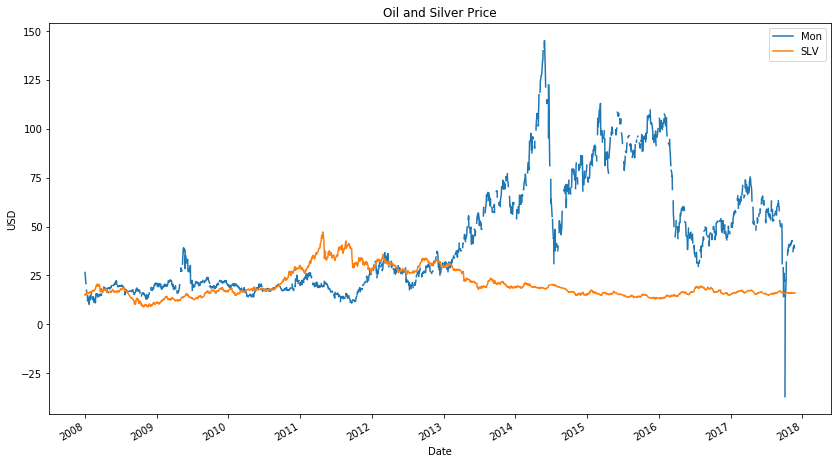

In [106]:
gld_slv.plot(x ='Date', y=['Mon','SLV'], figsize=(14,8))
# plt.plot(figsize=(14,8))
plt.title('Oil and Silver Price')
plt.ylabel('USD')
plt.show()

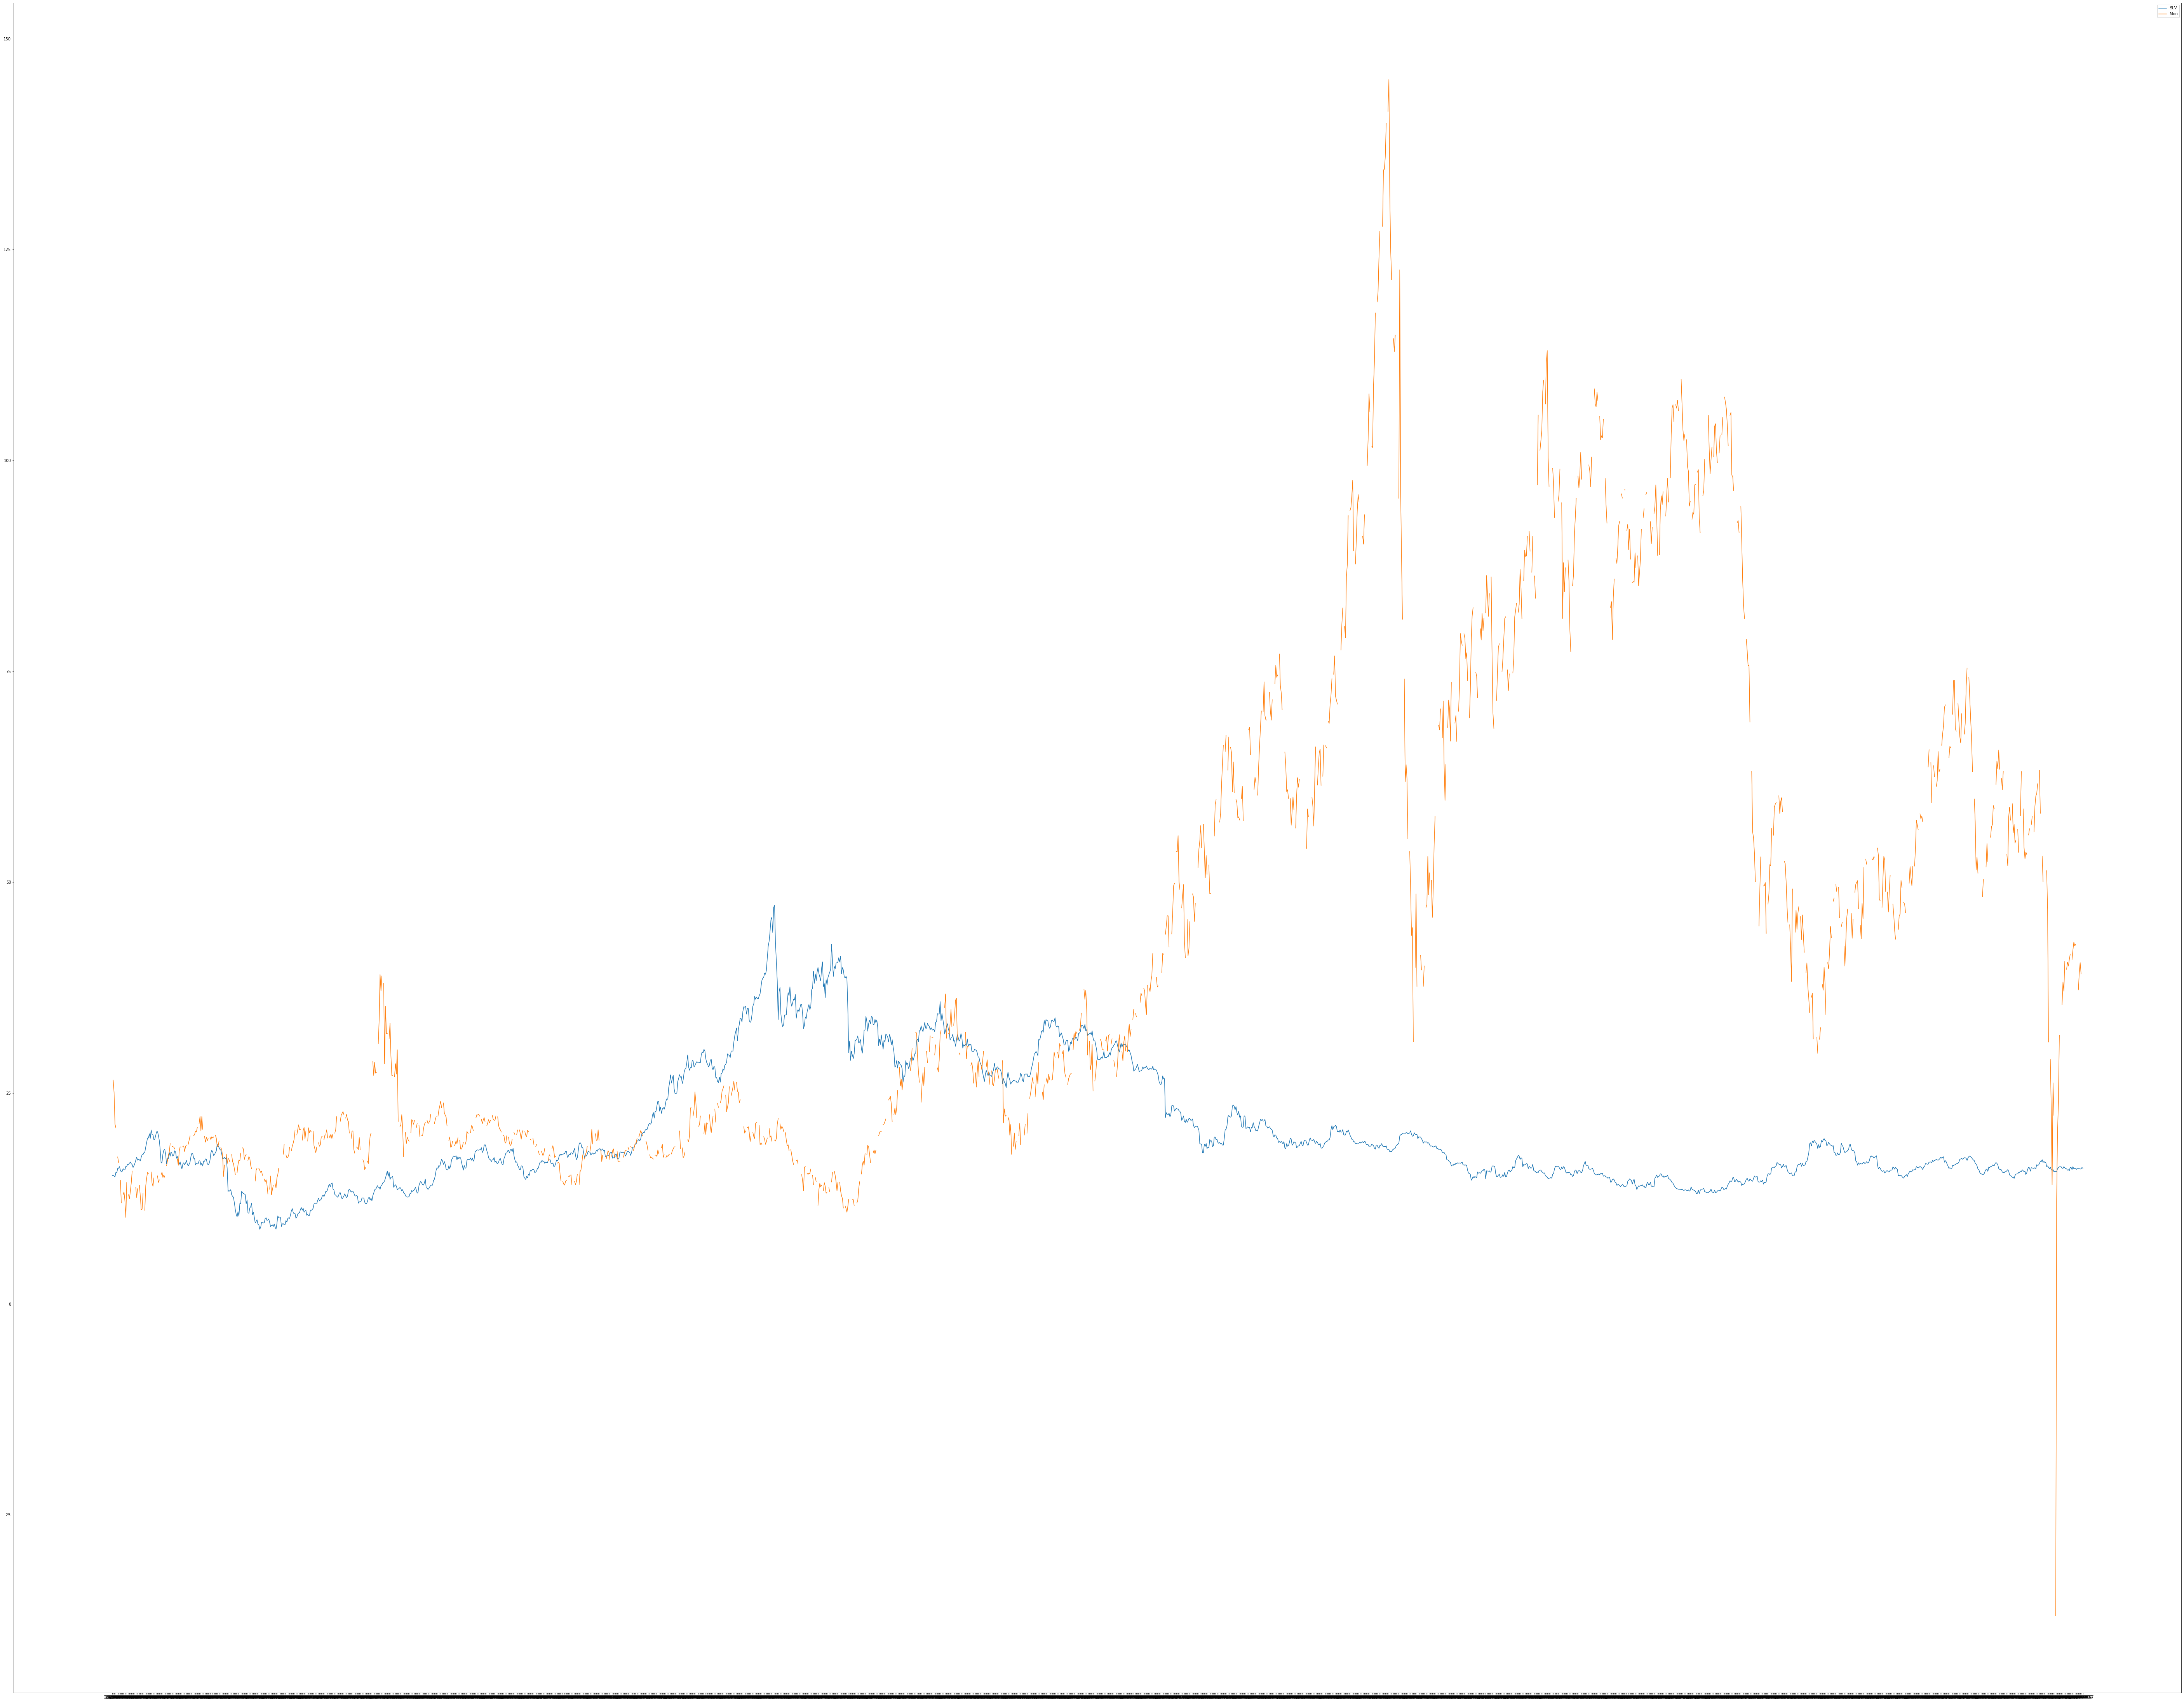

In [88]:
gld_slv.plot(figsize=(100,80))
plt.xticks(gld_slv.index, gld_slv['Date'].values)
plt.show()

In [84]:
x = gld_slv['Date']
y = gld_slv['SLV']
y2 = gld_slv ['Mon']

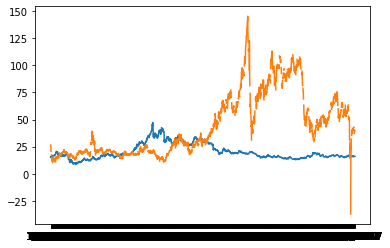

In [85]:
plt.plot(x,y)
plt.plot(x,y2)
plt.show()

In [79]:
grouped = gld_slv.groupby(['Date'], as_index=False)['Mon','SLV'].sum()

In [80]:
grouped.head(50)

,Date,Mon,SLV
0,1/10/2008,17.42,16.061001
1,1/10/2011,22.43,28.290001
2,1/10/2012,27.65,29.049999
3,1/10/2013,31.91,29.780001
4,1/10/2014,0.00,19.379999
5,1/10/2017,51.86,15.910000
6,1/11/2008,16.78,16.077000
7,1/11/2010,19.77,18.209999
8,1/11/2011,21.05,28.889999
9,1/11/2012,28.40,29.139999


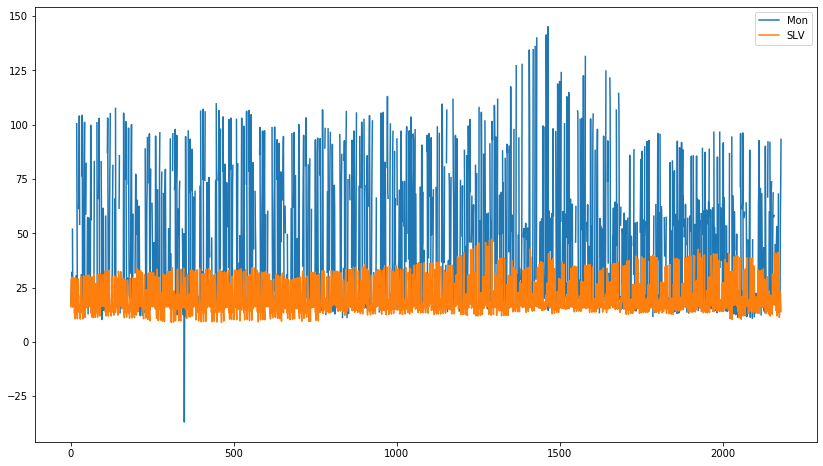

In [61]:
#plt.plot(gld_slv['Mon', 'SLV'])
grouped.plot(figsize=(14,8))
plt.show()

In [7]:
# to drop column:
df = df_1.drop(['Tue', 'Wed', 'Thu', 'Fri'], axis=1)
df.head()

,Week Of,Mon
0,1985 Dec-30 to Jan- 3,NaN
1,1986 Jan- 6 to Jan-10,26.53
2,1986 Jan-13 to Jan-17,25.08
3,1986 Jan-20 to Jan-24,21.33
4,1986 Jan-27 to Jan-31,20.87


In [8]:
#to drop rows:
#df1 = df.drop([0, 1, 2, 3])


In [9]:
df.dtypes

Week Of     object
Mon        float64
dtype: object

In [10]:
# we applied this function to get rid of $ signs:
#df1.Average = df1.Average.str.replace('$','').astype(float)
#df1.Low = df1.Low.str.replace('$','').astype(float)
#df1.High = df1.High.str.replace('$','').astype(float)


In [11]:
# we only select the last 31 entries, so we drop the first rows. We also drop the other two columns:
#df2 = df1.drop([4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18])
#df2 = df1.drop(['Low', 'High'], axis=1)


In [12]:
df.dtypes

Week Of     object
Mon        float64
dtype: object

In [13]:
subset = df.rename(columns={'Week Of':'Date', 'Mon':'OilPrice'})
len(subset)#.head()

2179

In [14]:
#Checking the missing values
round_1.isnull().sum()

NameError: name 'round_1' is not defined

In [ ]:
# Checking for the mean and median of the column so as to know what to fill the non values with
print(round_1['OilPrice'].mean())
print(round_1['OilPrice'].median())

In [ ]:
set(subset['OilPrice'])

In [ ]:
# Filling the missing values with the mean value of the column
subset['OilPrice'].fillna(43.74, inplace =True)


In [ ]:
subset.isnull().sum()

In [ ]:
subset.nlargest(60,'OilPrice')

In [ ]:
# Round the values in column OilPrice to 1 decimal place
round_1  = subset.round({'OilPrice':1})
round_1

In [ ]:
#this is to save the OilPrice column into CSV:
round_1.to_csv('new.oil.data_csv',index=False)

In [ ]:
# checking the oil dataset 
oil = pd.read_csv('new.oil.data_csv')

oil.isnull().sum()
oil.head()

In [ ]:
oil_1 = oil['OilPrice']
oil_1

In [ ]:
gold = pd.read_csv('gld_price_data.csv')
gold.head()
#len(gold)

In [ ]:
# this is to choose the rows we want
gold2 = gold.loc[0:2178]
gold2.head()
#len(gold2)

In [ ]:
gold2.columns

# Here you need to use two columns of gold database: Date and SLV, then concat the oilPrice into it:

In [ ]:
Silver = gold2[['Date',"SLV"]]
Silver

In [ ]:
silver = gold2.loc[:,'SLV']
# df.loc[df['Age']
len(silver)
silver.round(1)


In [ ]:
len(silver)

In [ ]:
data = pd.concat([Silver, oil_1], axis=1)
data.head(60)

In [ ]:
# checking to confirm if there is any missing value in our final dataset
data.isnull().sum()

In [ ]:
len(data)

In [ ]:
data.plot.scatter(x='Date', y='OilPrice' )

plt.show()